# Data & Code for Figure 2
## Rough outline
![Image Description](../FigureData/FigureOutline.png)

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import utilities as utils
import os
from pprint import pprint

os.environ['PYDEVD_WARN_SLOW_RESOLVE_TIMEOUT'] = '1'

data_path = '../FigureData/'

## Panel 1: task structure
### Data

In [2]:
input_data = np.load(data_path + 'panel_1/input_data.npy')

### Plotting

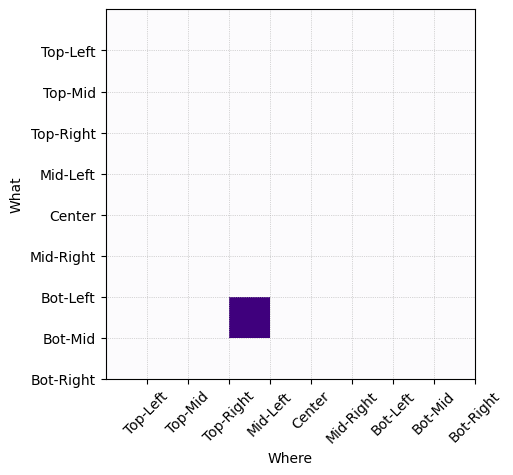

In [3]:
locations = shapes = ['Top-Left', 'Top-Mid', 'Top-Right',
                      'Mid-Left', 'Center', 'Mid-Right',
                      'Bot-Left', 'Bot-Mid', 'Bot-Right']
             
plt.imshow(input_data.reshape((9, 9)), cmap='Purples')
plt.xlabel('Where')
plt.ylabel('What')
plt.xticks(np.arange(9) + 0.5, locations, rotation=45)
plt.yticks(np.arange(9) + 0.5, shapes)
plt.grid(True, linestyle='dotted', linewidth=0.5)

## Panel 2: modularity
### Data

In [4]:
weight_data_2 = np.load(data_path + 'panel_2/weights.npy')
activity_data_2 = np.load(data_path + 'panel_2/responses.npy', allow_pickle=True)

### Plotting
#### Plotting weights

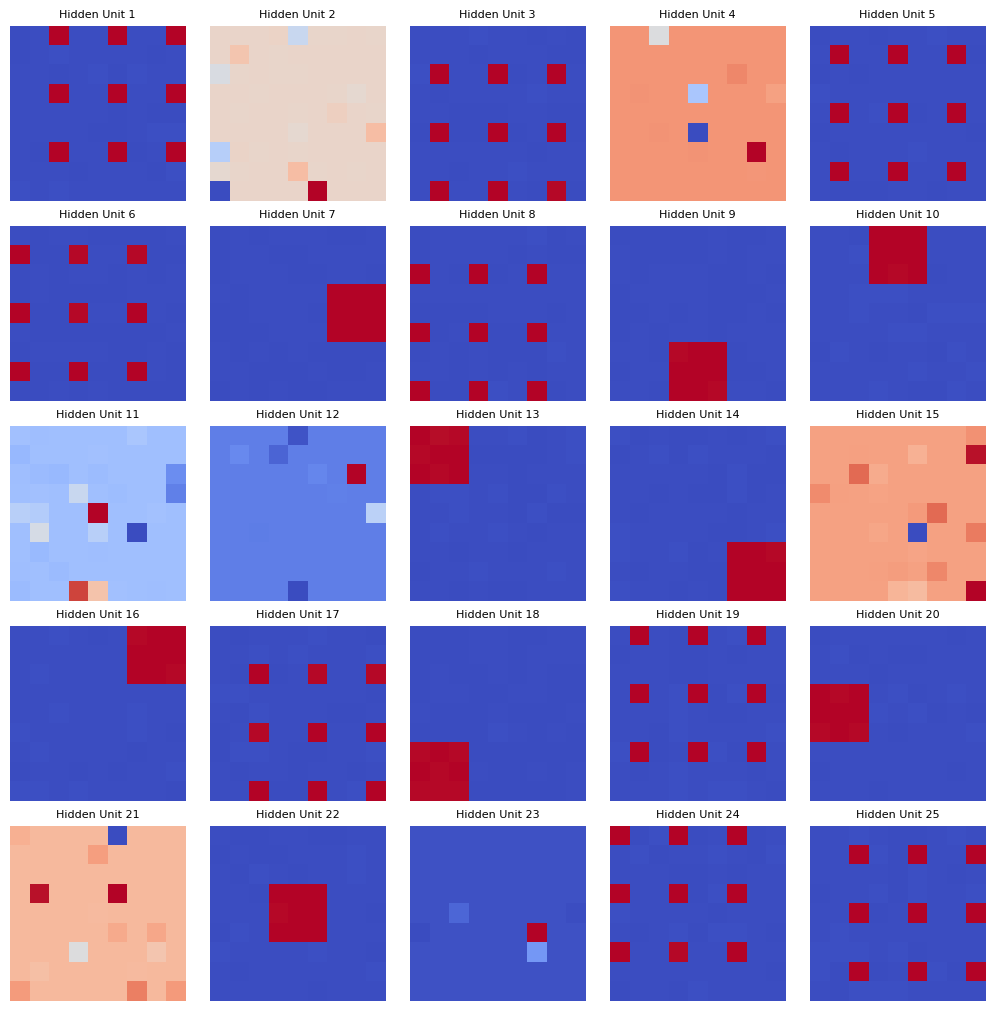

In [5]:
model_to_plot = 0

model_weights = weight_data_2[model_to_plot]

hidden_units = weight_data_2.shape[1]
nrows = int(np.ceil(np.sqrt(hidden_units)))
ncols = nrows

fig, axs = plt.subplots(nrows, ncols, figsize=(2*ncols, 2*nrows), constrained_layout=True)
axs = axs.flatten()

for i in range(hidden_units):
    weight_matrix = model_weights[i].reshape(9, 9)
    ax = axs[i]
    cax = ax.imshow(weight_matrix, cmap='coolwarm', interpolation='nearest')
    ax.set_title(f'Hidden Unit {i+1}', fontsize=8)
    ax.axis('off')

for i in range(hidden_units, nrows*ncols):
    axs[i].axis('off')
plt.show()

#### Plotting tuning curves

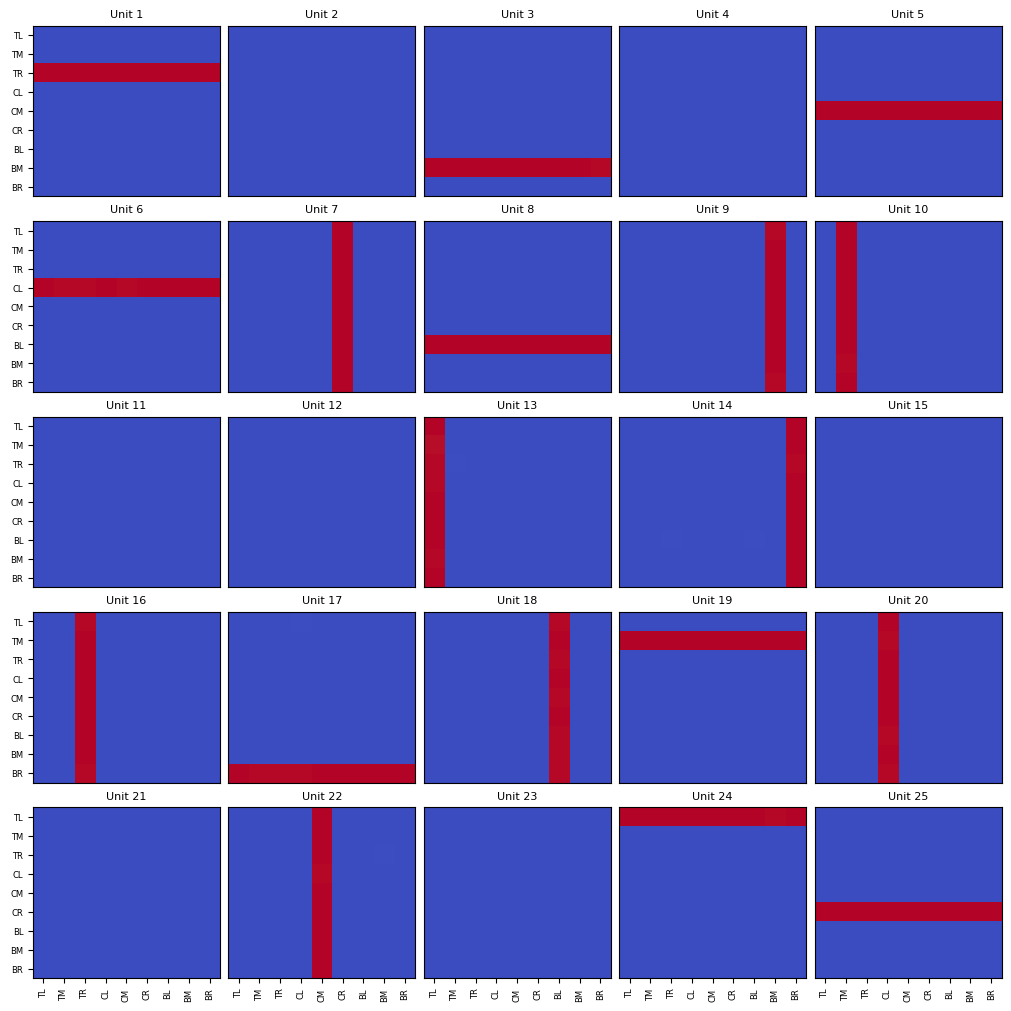

In [6]:
shapes = ['TL', 'TM', 'TR', 'CL', 'CM', 'CR', 'BL', 'BM', 'BR']
locations = ['TL', 'TM', 'TR', 'CL', 'CM', 'CR', 'BL', 'BM', 'BR']

response = activity_data_2[model_to_plot]
activations = np.array(response['activations'])
num_combinations = activations.shape[0]
num_hidden_units = activations.shape[2]

grid_size = int(np.sqrt(num_combinations))
nrows = int(np.ceil(np.sqrt(num_hidden_units)))
ncols = nrows

fig, axs = plt.subplots(nrows, ncols, figsize=(2 * ncols, 2 * nrows), constrained_layout=True)
axs = axs.flatten()

for i in range(num_hidden_units):
    activation_grid = activations[:, 0, i].reshape((grid_size, grid_size))
    im = axs[i].imshow(activation_grid, cmap='coolwarm', aspect='auto')
    axs[i].set_title(f'Unit {i+1}', fontsize=8)
    if i // ncols == nrows - 1:
        axs[i].set_xticks(range(grid_size))
        axs[i].set_xticklabels(locations, rotation=90, fontsize=6)
    else:
        axs[i].set_xticks([])

    if i % ncols == 0:
        axs[i].set_yticks(range(grid_size))
        axs[i].set_yticklabels(shapes, fontsize=6)
    else:
        axs[i].set_yticks([])

for ax in axs[num_hidden_units:]:
    ax.axis('off')

plt.show()

## Panel 3: sub-sampling
### Notes
- the data distribution plot should probably try to subsume all the distributions into one (likely using some sort of colour gradient, as in the rough figure). This could then be associated with the insets in the later modularity index plot
### Data

In [7]:
dropouts = [0, 1, 3, 6, 10, 15, 21, 28, 36]
data_distributions_3 = [np.load(data_path + f'panel_3/data_distribution_dropout_{dropout}.npy') for dropout in dropouts]
activity_data_3 = [np.load(data_path + f'panel_3/responses_dropout_{dropout}.npy', allow_pickle=True) for dropout in dropouts]

### Data distribution

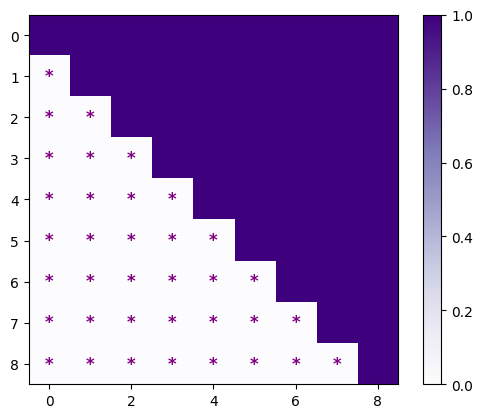

In [8]:
plt.imshow(data_distributions_3[-1], cmap='Purples')
plt.colorbar()
for i in range(9):
        for j in range(9):
            if data_distributions_3[-1][i][j] == 0.:
                plt.text(j, i, '*', ha='center', va='center', color='purple', fontsize=12, fontweight='bold')
plt.show()

### Tuning curves

Dropout: 0, Model: 0


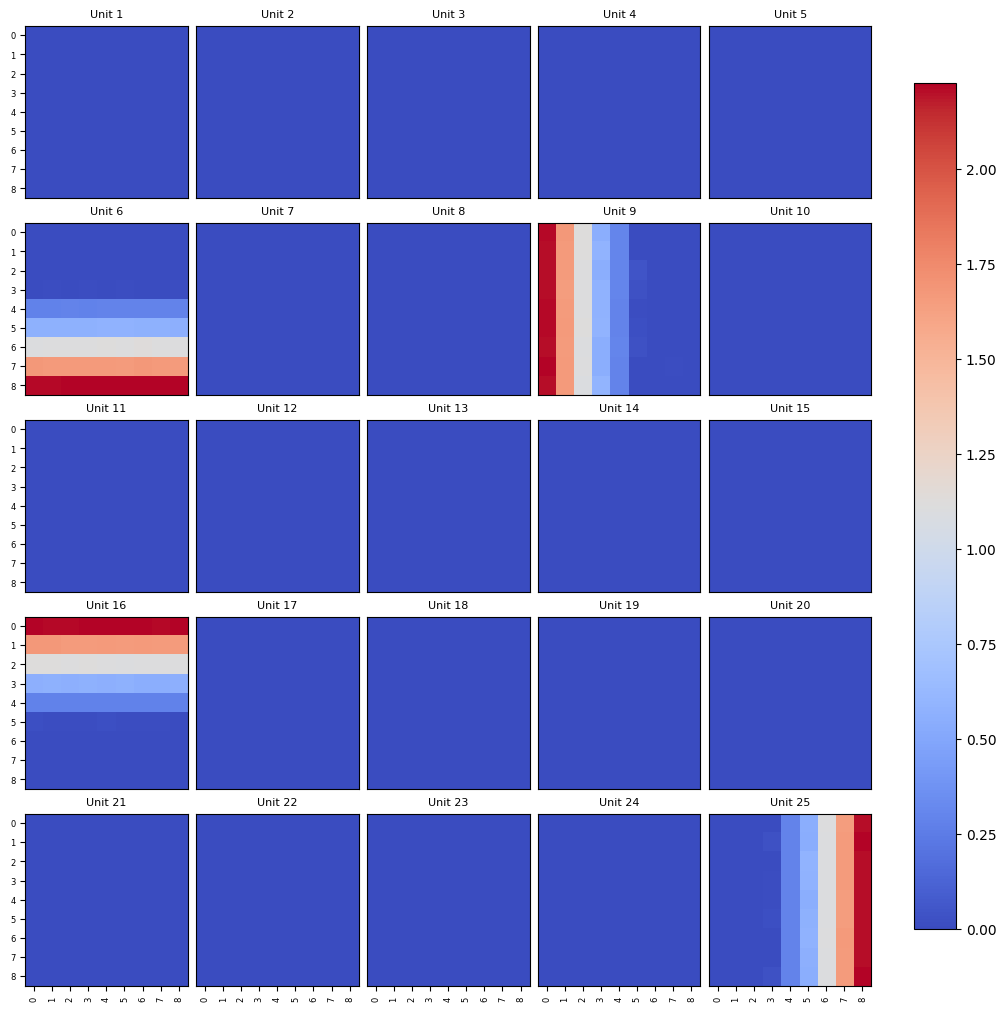

In [9]:
shapes = ['0', '1', '2', '3', '4', '5', '6', '7', '8']
locations = ['0', '1', '2', '3', '4', '5', '6', '7', '8']

d = 0
dropout = dropouts[d]
model_to_plot = 0

print(f'Dropout: {dropout}, Model: {model_to_plot}')
response = activity_data_3[d][model_to_plot]
activations = np.array(response['activations'])
num_combinations = activations.shape[0]
num_hidden_units = activations.shape[2]

grid_size = int(np.sqrt(num_combinations))
nrows = int(np.ceil(np.sqrt(num_hidden_units)))
ncols = nrows

fig, axs = plt.subplots(nrows, ncols, figsize=(2 * ncols, 2 * nrows), constrained_layout=True)
axs = axs.flatten()

for i in range(num_hidden_units):
    activation_grid = activations[:, 0, i].reshape((grid_size, grid_size))
    im = axs[i].imshow(activation_grid, cmap='coolwarm', aspect='auto')
    axs[i].set_title(f'Unit {i+1}', fontsize=8)
    if i // ncols == nrows - 1:
        axs[i].set_xticks(range(grid_size))
        axs[i].set_xticklabels(locations, rotation=90, fontsize=6)
    else:
        axs[i].set_xticks([])

    if i % ncols == 0:
        axs[i].set_yticks(range(grid_size))
        axs[i].set_yticklabels(shapes, fontsize=6)
    else:
        axs[i].set_yticks([])

for ax in axs[num_hidden_units:]:
    ax.axis('off')
fig.colorbar(im, ax=axs, orientation='vertical', fraction=0.05, pad=0.05)

plt.show()

### Variance-based modularity index

Dropout: 0, Model: 5


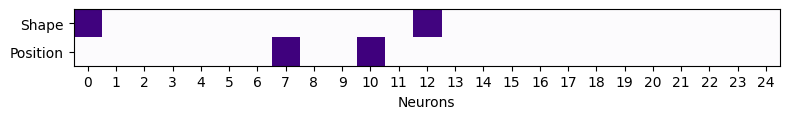

Dropout: 1, Model: 5


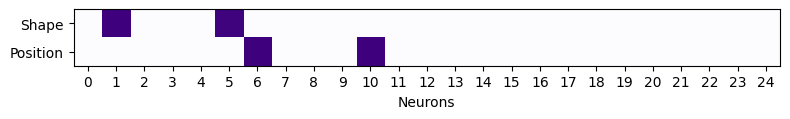

Dropout: 3, Model: 5


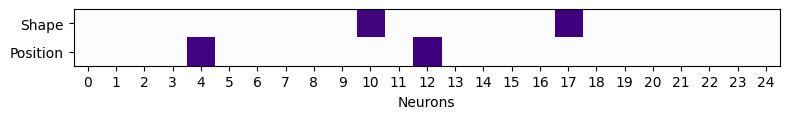

Dropout: 6, Model: 5


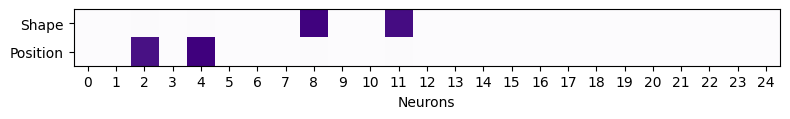

Dropout: 10, Model: 5


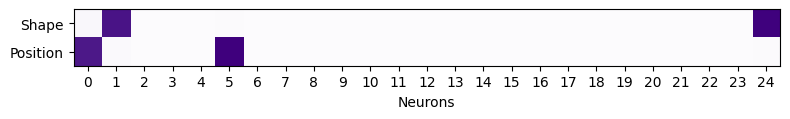

Dropout: 15, Model: 5


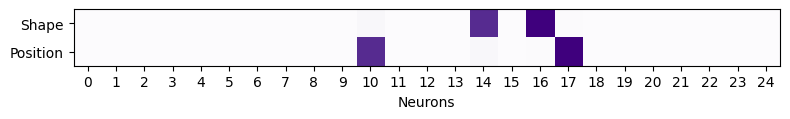

Dropout: 21, Model: 5


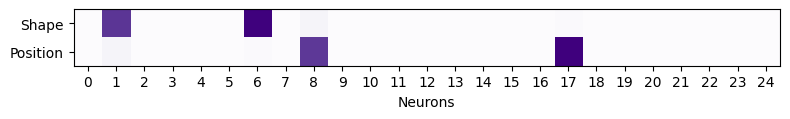

Dropout: 28, Model: 5


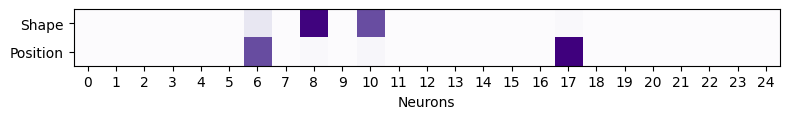

Dropout: 36, Model: 5


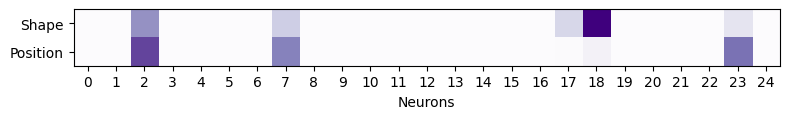

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


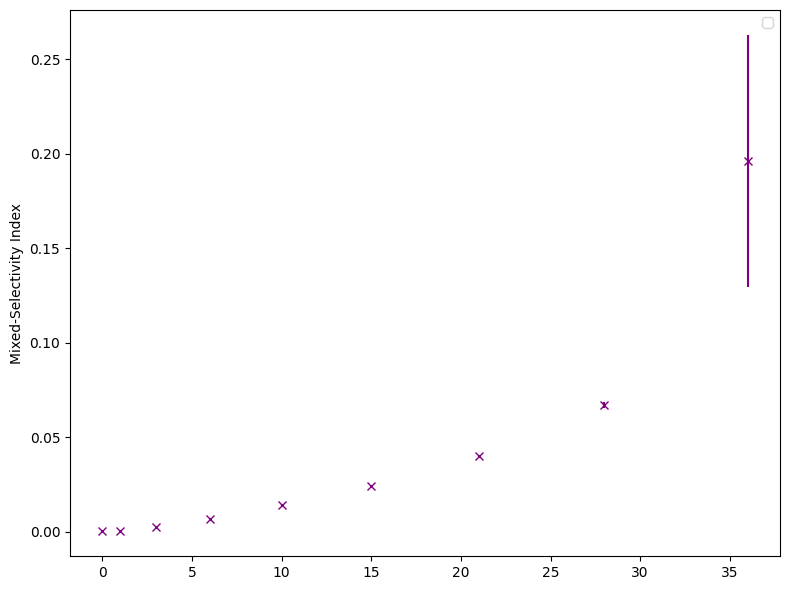

In [10]:
corner_contributions = []
all_variances = []
for d, dropout in enumerate(dropouts):
    num_shapes = num_positions = 9
    variances = {
        'shape' : [],
        'position' : []
    }
    for i, response in enumerate(activity_data_3[d]):
        activations = np.array(response['activations']).reshape(-1, 25)
        inputs_info = response['input']

        organised_activations = np.zeros((num_shapes, num_positions, activations.shape[1]))

        for idx, info in enumerate(inputs_info):
            shape_idx = info['what_index']
            position_idx = info['where_index']
            if data_distributions_3[d][shape_idx][position_idx] == 1:
                organised_activations[shape_idx, position_idx] = activations[idx]
            else:
                organised_activations[shape_idx, position_idx] = np.nan
                
        var_shape = np.nanvar(organised_activations, axis=1)
        mean_var_shape = np.mean(var_shape, axis=0)

        var_position = np.nanvar(organised_activations, axis=0)
        mean_var_position = np.mean(var_position, axis=0)

        mean_variances = np.vstack((mean_var_shape, mean_var_position))

        variances['shape'].append(mean_var_shape)
        variances['position'].append(mean_var_position)

    print(f'Dropout: {dropout}, Model: {i+1}')
    utils.plot_shape_position_variance(mean_variances)
    all_variances.append(variances)

    contributions = []
    for shape_var, position_var in zip(variances['shape'], variances['position']):
        total_var = shape_var + position_var
        min_var = np.minimum(shape_var, position_var)
        contribution = np.sum(min_var) / np.sum(total_var)
        contributions.append(contribution)
    corner_contributions.append(contributions)
utils.plot_MI(corner_contributions, dropouts)

### Conditional mutual information

Dropout: 0, Model: 5


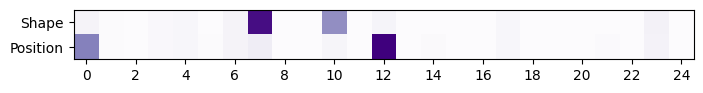

Dropout: 1, Model: 5


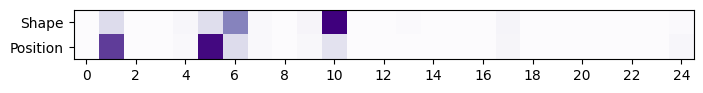

Dropout: 3, Model: 5


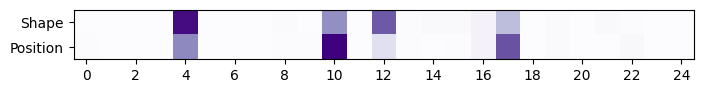

Dropout: 6, Model: 5


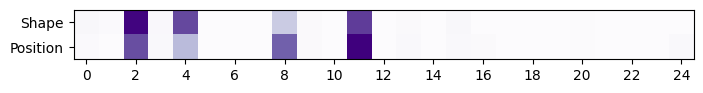

Dropout: 10, Model: 5


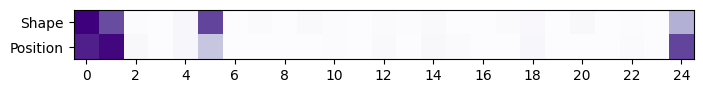

Dropout: 15, Model: 5


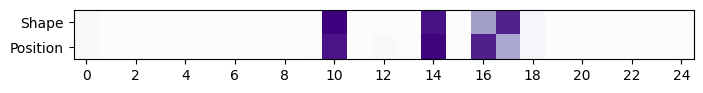

Dropout: 21, Model: 5


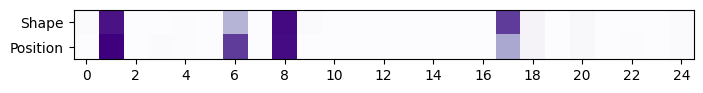

Dropout: 28, Model: 5


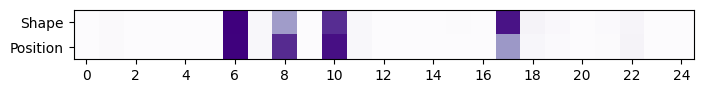

Dropout: 36, Model: 5


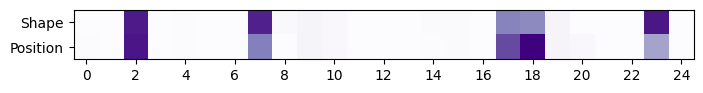

In [11]:
all_metrics = []
for i, dropout in enumerate(dropouts):
    dropout_metrics = []
    for j, response in enumerate(activity_data_3[i]):
        activations = np.array(response['activations']).reshape(-1, 25)
        inputs_info = response['input']

        sources = np.zeros((81, 2))
        latents = np.zeros((81, 25))

        for idx, info in enumerate(inputs_info):
            sources[idx, 0] = info['what_index']
            sources[idx, 1] = info['where_index']
            if data_distributions_3[d].flatten()[idx] == 1:
                latents[idx] = activations[idx]
            else:
                latents[idx] = np.nan
        sources = sources[~np.isnan(latents).any(axis=1)]
        latents = latents[~np.isnan(latents).any(axis=1)]
        metrics = utils.compute_metrics(sources, latents, s_type='discrete', z_type='continuous', n_neighbors=3, n_duplicate=5, z_noise=1e-2)
        dropout_metrics.append(metrics)
    print(f'Dropout: {dropout}, Model: {j+1}')
    utils.plot_ncmi(metrics)
    all_metrics.append(dropout_metrics)

### Source-to-source mutual information

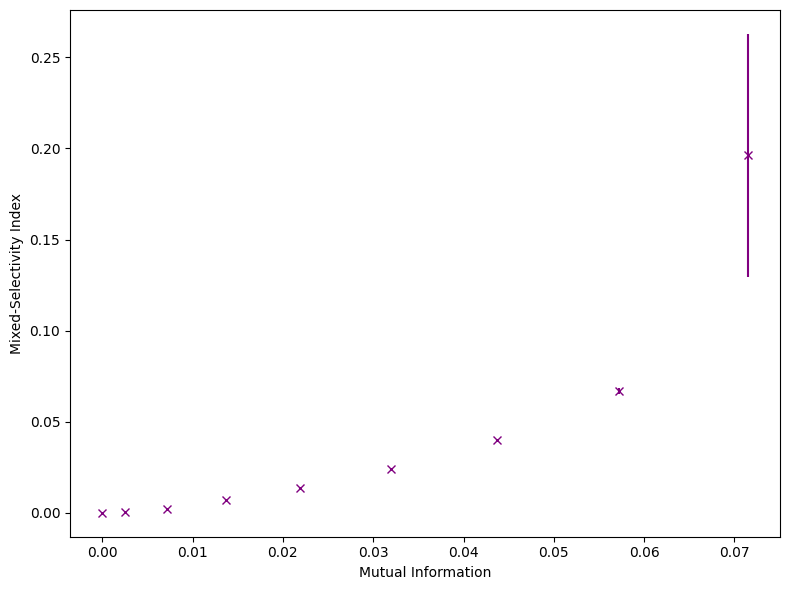

In [12]:
corner_nmis = []
for i, dropout in enumerate(dropouts):
    dropout_nmis = []
    for j, response in enumerate(activity_data_3[i]):
        activations = np.array(response['activations']).reshape(-1, 25)
        inputs_info = response['input']

        source1 = np.zeros((81, 1))
        source2 = np.zeros((81, 1))

        for idx, info in enumerate(inputs_info):
            if np.array(data_distributions_3[i]).flatten()[idx] == 1:
                source1[idx] = info['what_index']
                source2[idx] = info['where_index']
            else:
                source1[idx] = np.nan
                source2[idx] = np.nan
        source1 = source1[~np.isnan(source1).any(axis=1)]
        source2 = source2[~np.isnan(source2).any(axis=1)]
        # nmi = utils.mutual_information(source1, source2)
        sources = np.hstack((source1, source2))
        nmi = utils.normalized_multiinformation(sources)
        dropout_nmis.append(nmi)
    corner_nmis.append(dropout_nmis)
corner_nmis = np.array([corner_nmi[0] for corner_nmi in corner_nmis])
utils.plot_MI_vs_mi(contributions=corner_contributions, mutual_information=corner_nmis, type='dropout')

### Linear predictive information

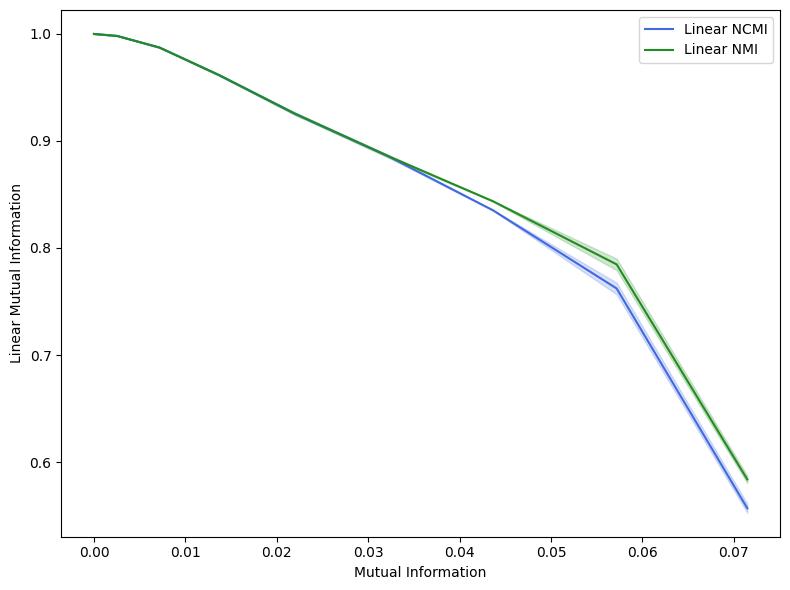

In [13]:
corner_lins = []
for i, dropout in enumerate(dropouts):
    dropout_corner_lins = []
    for j, response in enumerate(activity_data_3[i]):
        activations = np.array(response['activations']).reshape(-1, 25)
        inputs_info = response['input']

        sources = np.zeros((81, 2))
        latents = np.zeros((81, 25))

        for idx, info in enumerate(inputs_info):
            sources[idx, 0] = info['what_index']
            sources[idx, 1] = info['where_index']
            if data_distributions_3[i].flatten()[idx] == 1:
                latents[idx] = activations[idx]
            else:
                latents[idx] = np.nan
        sources = sources[~np.isnan(latents).any(axis=1)]
        latents = latents[~np.isnan(latents).any(axis=1)]
        lins = utils.compute_linear_metrics(sources, latents, 'continuous')
        # pprint(lins)
        dropout_corner_lins.append(lins)
    corner_lins.append(dropout_corner_lins)
utils.plot_lpmi(corner_lins, corner_nmis)

## Panel 3.2: diagonal dropout
### Data

In [14]:
diag_dropouts = [0, 1, 3, 5, 7, 9, 11, 13, 15, 17]
data_distributions_31 = [np.load(data_path + f'panel_3/data_distribution_diag_{dropout}.npy') for dropout in diag_dropouts]
activity_data_31 = [np.load(data_path + f'panel_3/responses_diag_{dropout}.npy', allow_pickle=True) for dropout in diag_dropouts]

### Plotting

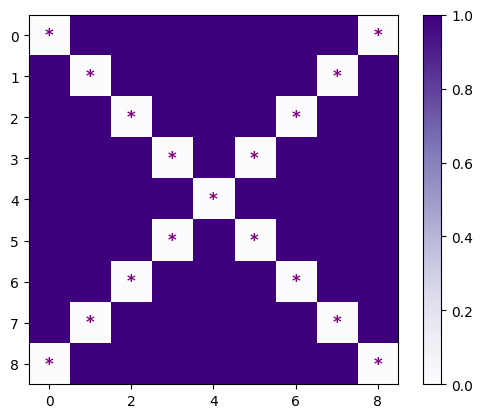

In [15]:
plt.imshow(data_distributions_31[-1], cmap='Purples')
plt.colorbar()
for i in range(9):
        for j in range(9):
            if data_distributions_31[-1][i][j] == 0.:
                plt.text(j, i, '*', ha='center', va='center', color='purple', fontsize=12, fontweight='bold')
plt.show()

### Tuning curves

Dropout: 17, Model: 0


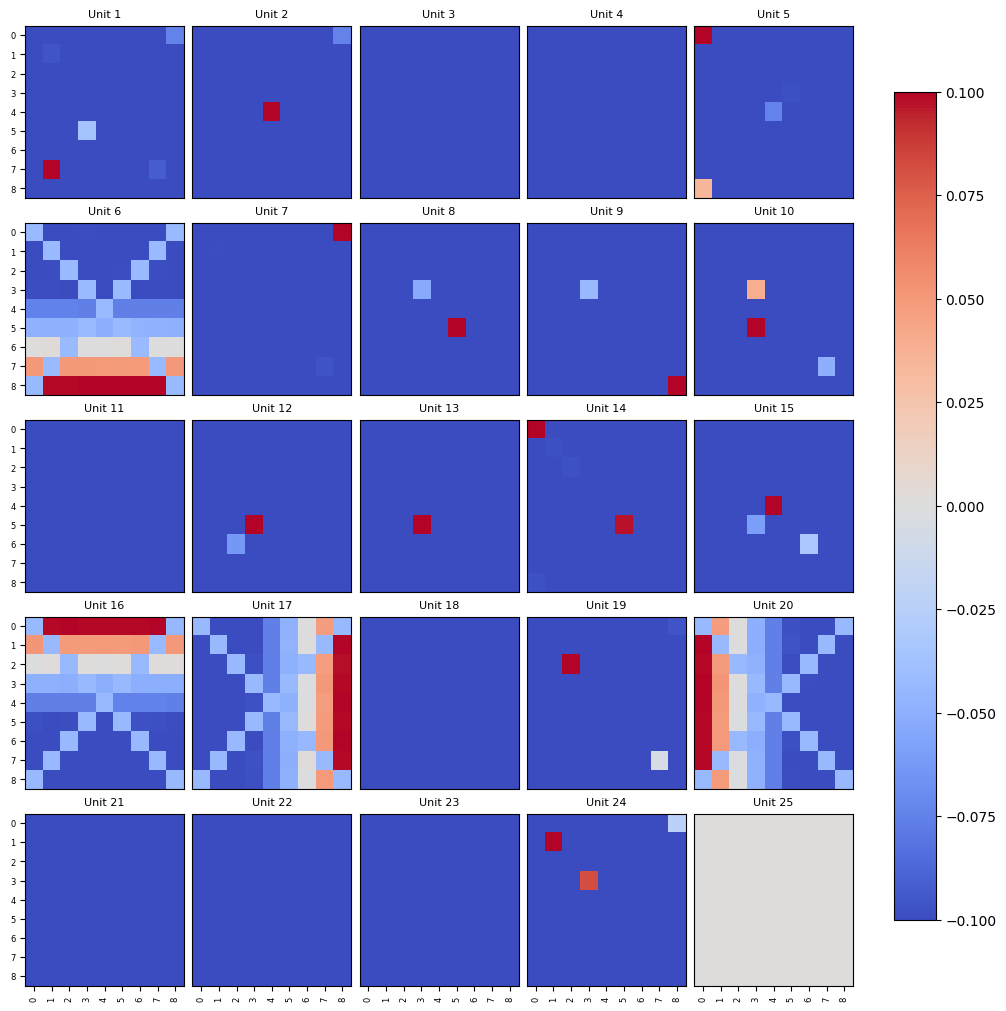

In [16]:
shapes = ['0', '1', '2', '3', '4', '5', '6', '7', '8']
locations = ['0', '1', '2', '3', '4', '5', '6', '7', '8']

d = 9
dropout = diag_dropouts[d]
model_to_plot = 0

print(f'Dropout: {dropout}, Model: {model_to_plot}')
response = activity_data_31[d][model_to_plot]
activations = np.array(response['activations'])
num_combinations = activations.shape[0]
num_hidden_units = activations.shape[2]

grid_size = int(np.sqrt(num_combinations))
nrows = int(np.ceil(np.sqrt(num_hidden_units)))
ncols = nrows

fig, axs = plt.subplots(nrows, ncols, figsize=(2 * ncols, 2 * nrows), constrained_layout=True)
axs = axs.flatten()

for i in range(num_hidden_units):
    activation_grid = activations[:, 0, i].reshape((grid_size, grid_size))
    im = axs[i].imshow(activation_grid, cmap='coolwarm', aspect='auto')
    axs[i].set_title(f'Unit {i+1}', fontsize=8)
    if i // ncols == nrows - 1:
        axs[i].set_xticks(range(grid_size))
        axs[i].set_xticklabels(locations, rotation=90, fontsize=6)
    else:
        axs[i].set_xticks([])

    if i % ncols == 0:
        axs[i].set_yticks(range(grid_size))
        axs[i].set_yticklabels(shapes, fontsize=6)
    else:
        axs[i].set_yticks([])

for ax in axs[num_hidden_units:]:
    ax.axis('off')
fig.colorbar(im, ax=axs, orientation='vertical', fraction=0.05, pad=0.05)

plt.show()

### Variance-based MI

Dropout: 0, Model: 5


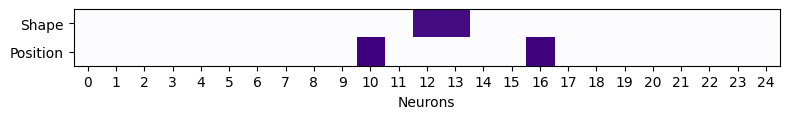

Dropout: 1, Model: 5


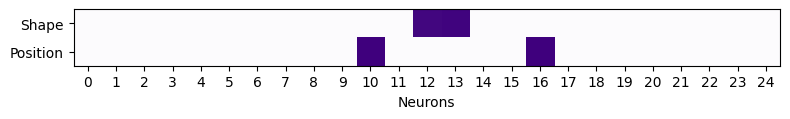

Dropout: 3, Model: 5


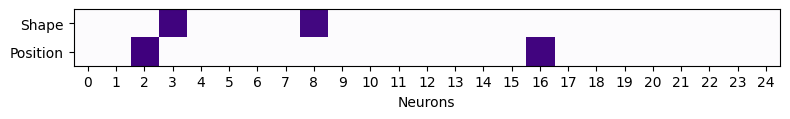

Dropout: 5, Model: 5


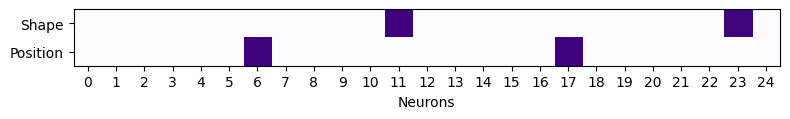

Dropout: 7, Model: 5


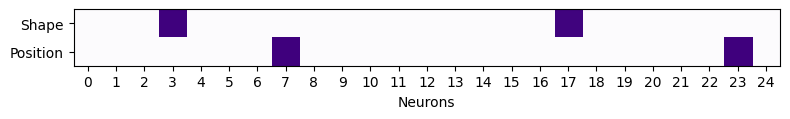

Dropout: 9, Model: 5


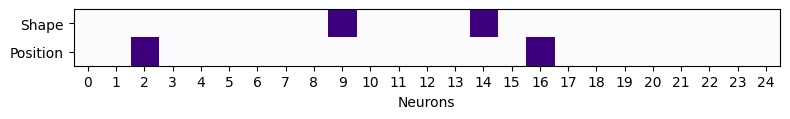

Dropout: 11, Model: 5


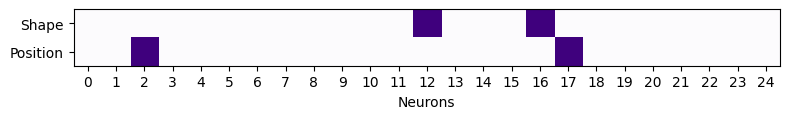

Dropout: 13, Model: 5


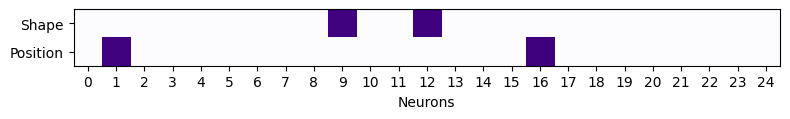

Dropout: 15, Model: 5


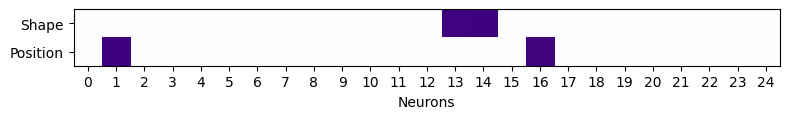

Dropout: 17, Model: 5


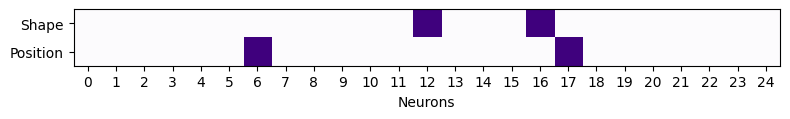

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


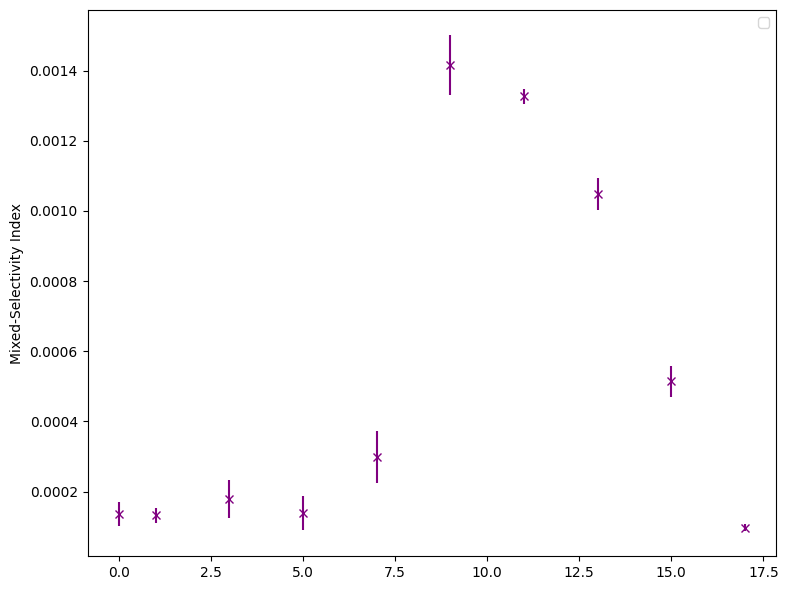

In [17]:
diag_contributions = []
all_variances = []
for d, dropout in enumerate(diag_dropouts):
    num_shapes = num_positions = 9
    variances = {
        'shape' : [],
        'position' : []
    }
    for i, response in enumerate(activity_data_31[d]):
        activations = np.array(response['activations']).reshape(-1, 25)
        inputs_info = response['input']

        organised_activations = np.zeros((num_shapes, num_positions, activations.shape[1]))

        for idx, info in enumerate(inputs_info):
            shape_idx = info['what_index']
            position_idx = info['where_index']
            if data_distributions_31[d][shape_idx][position_idx] == 1:
                organised_activations[shape_idx, position_idx] = activations[idx]
            else:
                organised_activations[shape_idx, position_idx] = np.nan
                
        var_shape = np.nanvar(organised_activations, axis=1)
        mean_var_shape = np.mean(var_shape, axis=0)

        var_position = np.nanvar(organised_activations, axis=0)
        mean_var_position = np.mean(var_position, axis=0)

        mean_variances = np.vstack((mean_var_shape, mean_var_position))

        variances['shape'].append(mean_var_shape)
        variances['position'].append(mean_var_position)
    print(f'Dropout: {dropout}, Model: {i+1}')
    utils.plot_shape_position_variance(mean_variances)
    all_variances.append(variances)

    contributions = []
    for shape_var, position_var in zip(variances['shape'], variances['position']):
        total_var = shape_var + position_var
        min_var = np.minimum(shape_var, position_var)
        contribution = np.sum(min_var) / np.sum(total_var)
        contributions.append(contribution)
    diag_contributions.append(contributions)
utils.plot_MI(diag_contributions, diag_dropouts)

### Conditional mutual information

Dropout: 0, Model: 5


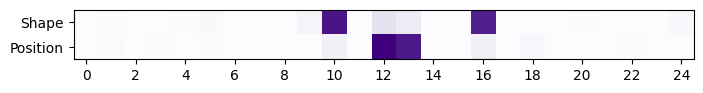

Dropout: 1, Model: 5


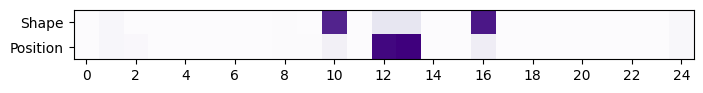

Dropout: 3, Model: 5


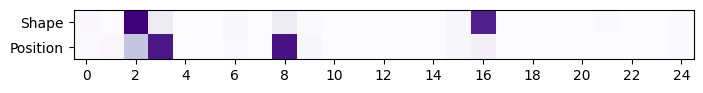

Dropout: 5, Model: 5


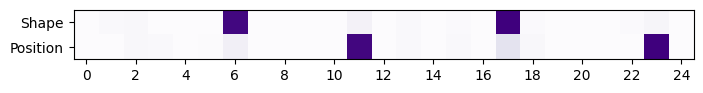

Dropout: 7, Model: 5


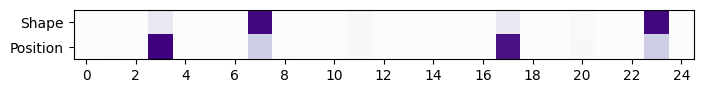

Dropout: 9, Model: 5


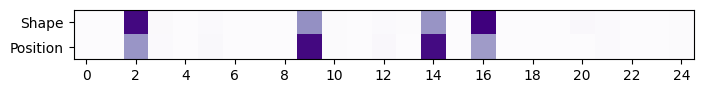

Dropout: 11, Model: 5


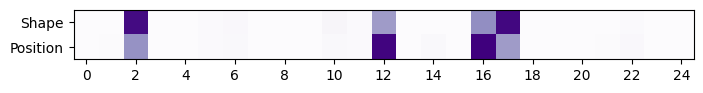

Dropout: 13, Model: 5


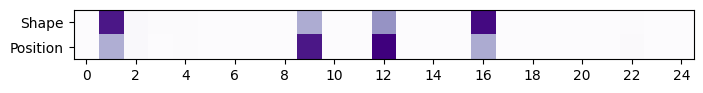

Dropout: 15, Model: 5


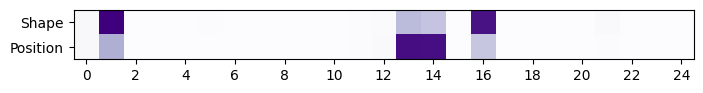

Dropout: 17, Model: 5


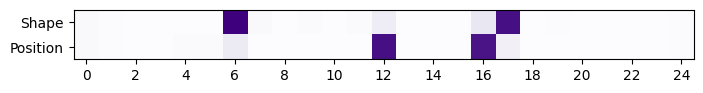

In [18]:
all_metrics = []
for i, dropout in enumerate(diag_dropouts):
    dropout_metrics = []
    for j, response in enumerate(activity_data_31[i]):
        activations = np.array(response['activations']).reshape(-1, 25)
        inputs_info = response['input']

        sources = np.zeros((81, 2))
        latents = np.zeros((81, 25))

        for idx, info in enumerate(inputs_info):
            sources[idx, 0] = info['what_index']
            sources[idx, 1] = info['where_index']
            if data_distributions_31[d].flatten()[idx] == 1:
                latents[idx] = activations[idx]
            else:
                latents[idx] = np.nan
        sources = sources[~np.isnan(latents).any(axis=1)]
        latents = latents[~np.isnan(latents).any(axis=1)]
        metrics = utils.compute_metrics(sources, latents, s_type='discrete', z_type='continuous', n_neighbors=3, n_duplicate=5, z_noise=1e-2)
        dropout_metrics.append(metrics)
    print(f'Dropout: {dropout}, Model: {j+1}')
    utils.plot_ncmi(metrics)
    all_metrics.append(dropout_metrics)

### Source-to-source mutual information

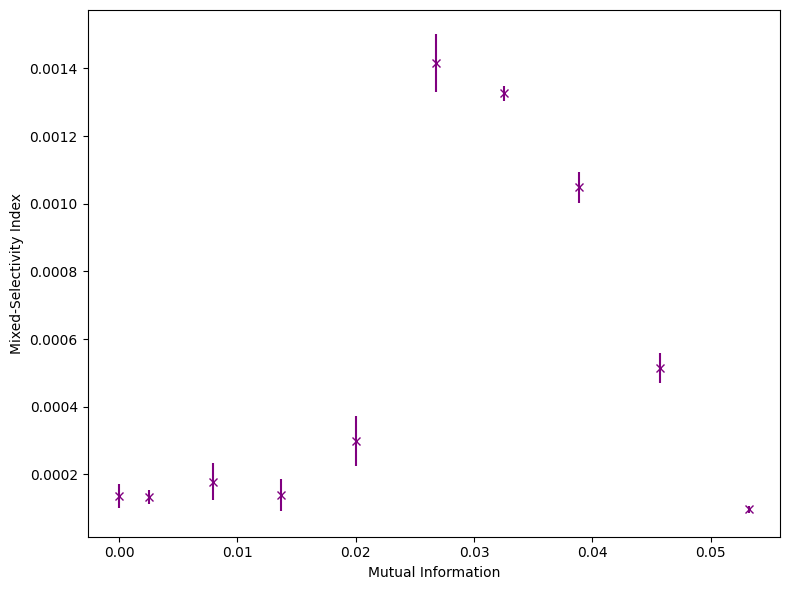

In [32]:
diag_nmis = [] = []
for i, dropout in enumerate(diag_dropouts):
    dropout_nmis = []
    for j, response in enumerate(activity_data_31[i]):
        activations = np.array(response['activations']).reshape(-1, 25)
        inputs_info = response['input']

        source1 = np.zeros((81, 1))
        source2 = np.zeros((81, 1))

        for idx, info in enumerate(inputs_info):
            if np.array(data_distributions_31[i]).flatten()[idx] == 1:
                source1[idx] = info['what_index']
                source2[idx] = info['where_index']
            else:
                source1[idx] = np.nan
                source2[idx] = np.nan
        source1 = source1[~np.isnan(source1).any(axis=1)]
        source2 = source2[~np.isnan(source2).any(axis=1)]
        # nmi = utils.mutual_information(source1, source2)
        sources = np.hstack((source1, source2))
        nmi = utils.normalized_multiinformation(sources)
        dropout_nmis.append(nmi)
    diag_nmis.append(dropout_nmis)
diag_nmis = np.array([diag_nmi[0] for diag_nmi in diag_nmis])
utils.plot_MI_vs_mi(contributions=diag_contributions, mutual_information=diag_nmis, type='dropout')

### Linear predictive information

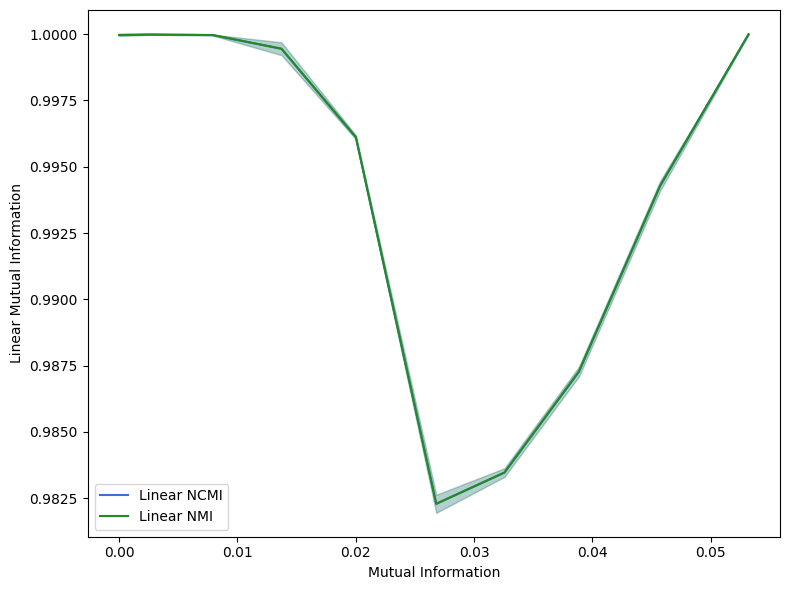

In [33]:
diag_lins = []
for i, dropout in enumerate(diag_dropouts):
    dropout_diag_lins = []
    for j, response in enumerate(activity_data_31[i]):
        activations = np.array(response['activations']).reshape(-1, 25)
        inputs_info = response['input']

        sources = np.zeros((81, 2))
        latents = np.zeros((81, 25))

        for idx, info in enumerate(inputs_info):
            sources[idx, 0] = info['what_index']
            sources[idx, 1] = info['where_index']
            if data_distributions_31[i].flatten()[idx] == 1:
                latents[idx] = activations[idx]
            else:
                latents[idx] = np.nan
        sources = sources[~np.isnan(latents).any(axis=1)]
        latents = latents[~np.isnan(latents).any(axis=1)]
        lins = utils.compute_linear_metrics(sources, latents, 'continuous')
        # pprint(lins)
        dropout_diag_lins.append(lins)
    diag_lins.append(dropout_diag_lins)
utils.plot_lpmi(diag_lins, diag_nmis)

## Panel 4: correlations
Here single data points appear along the diagonal and N at all other points
### Data

In [21]:
correlations = [1, 2, 3, 4, 5]
data_distributions_4 = [np.load(data_path + f'panel_4/data_distribution_corr_{corr}.npy') for corr in correlations]
activity_data_4 = [np.load(data_path + f'panel_4/responses_corr_{corr}.npy', allow_pickle=True) for corr in correlations]

high_correlations = [10]
data_distributions_41 = [np.load(data_path + f'panel_4/data_distribution_corr_{corr}.npy') for corr in high_correlations]
activity_data_41 = [np.load(data_path + f'panel_4/responses_corr_{corr}.npy', allow_pickle=True) for corr in high_correlations]

### Data distribution

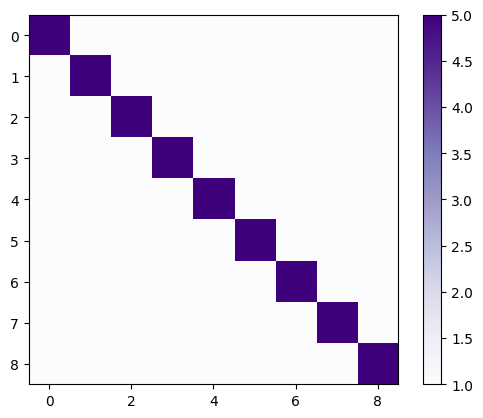

In [22]:
plt.imshow(data_distributions_4[-1], cmap='Purples')
plt.colorbar()
plt.show()

### Tuning curves

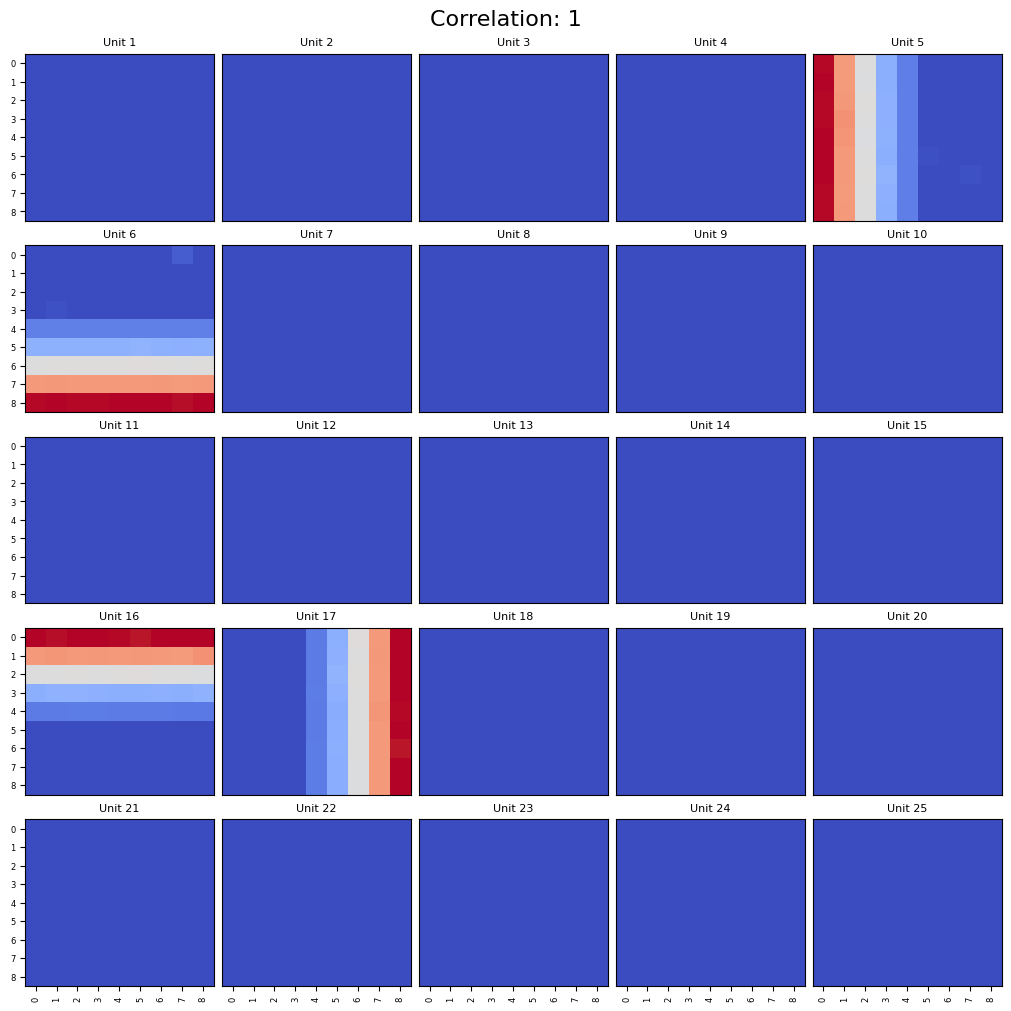

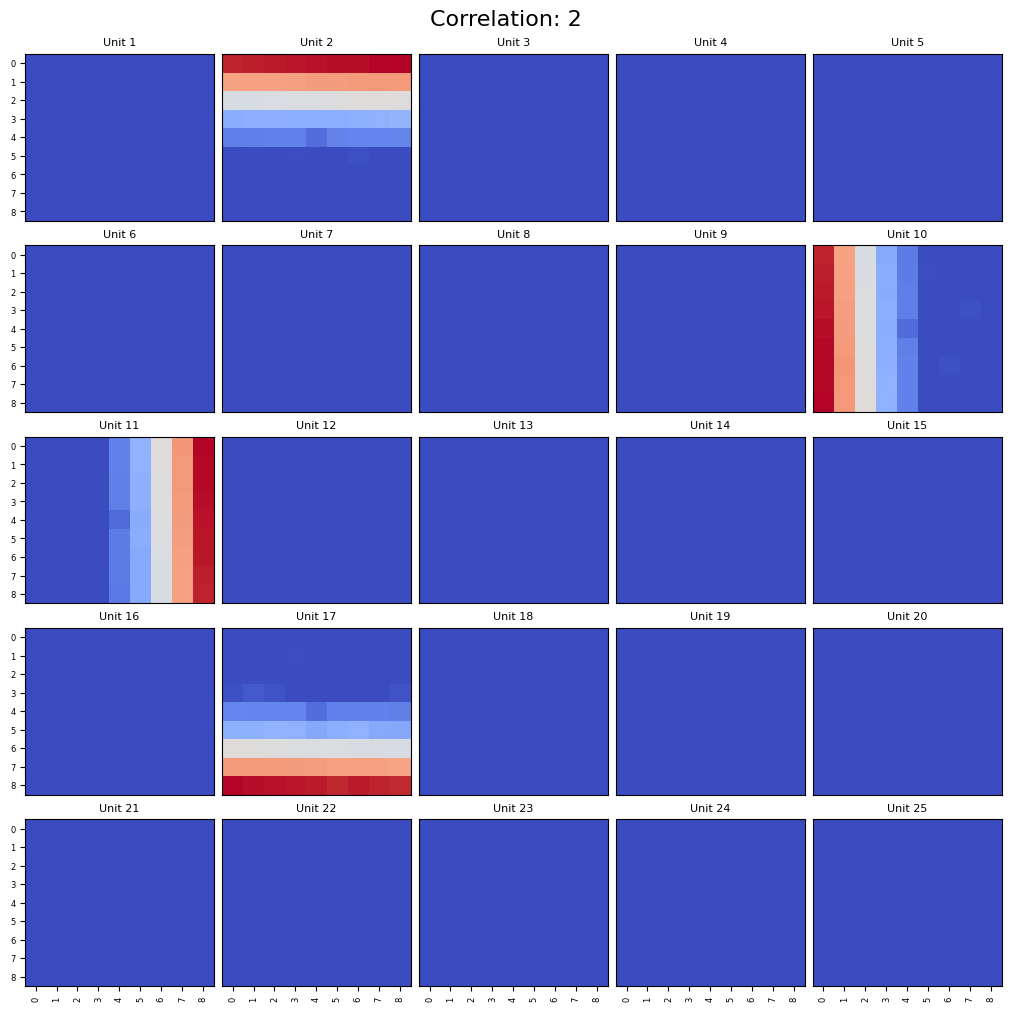

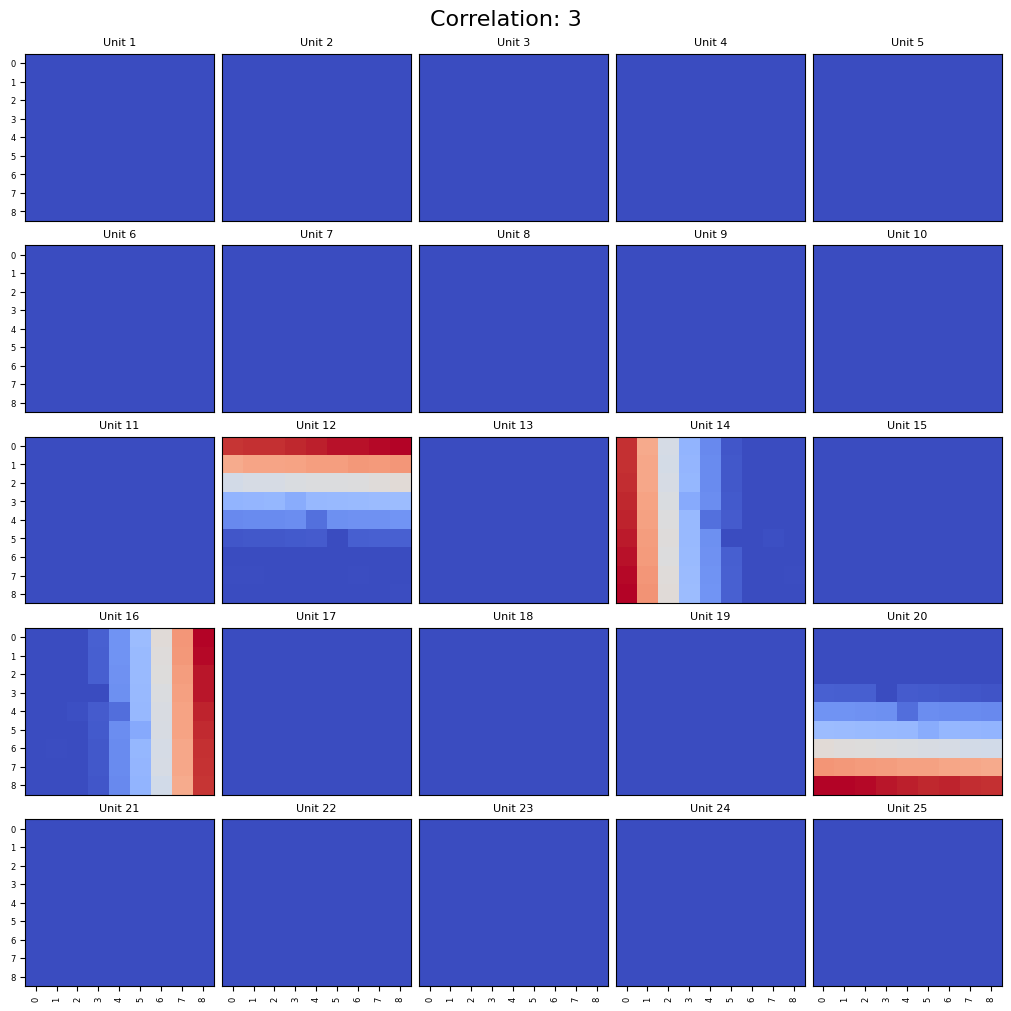

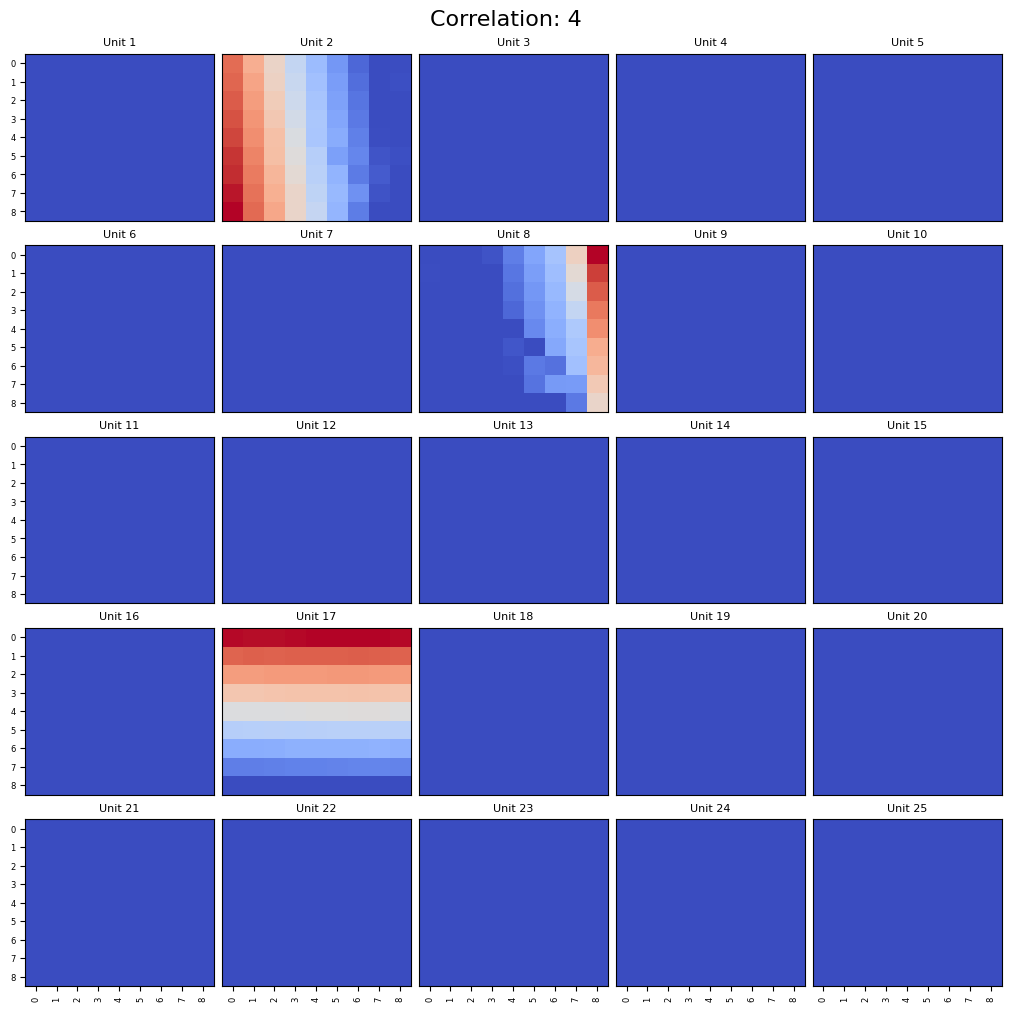

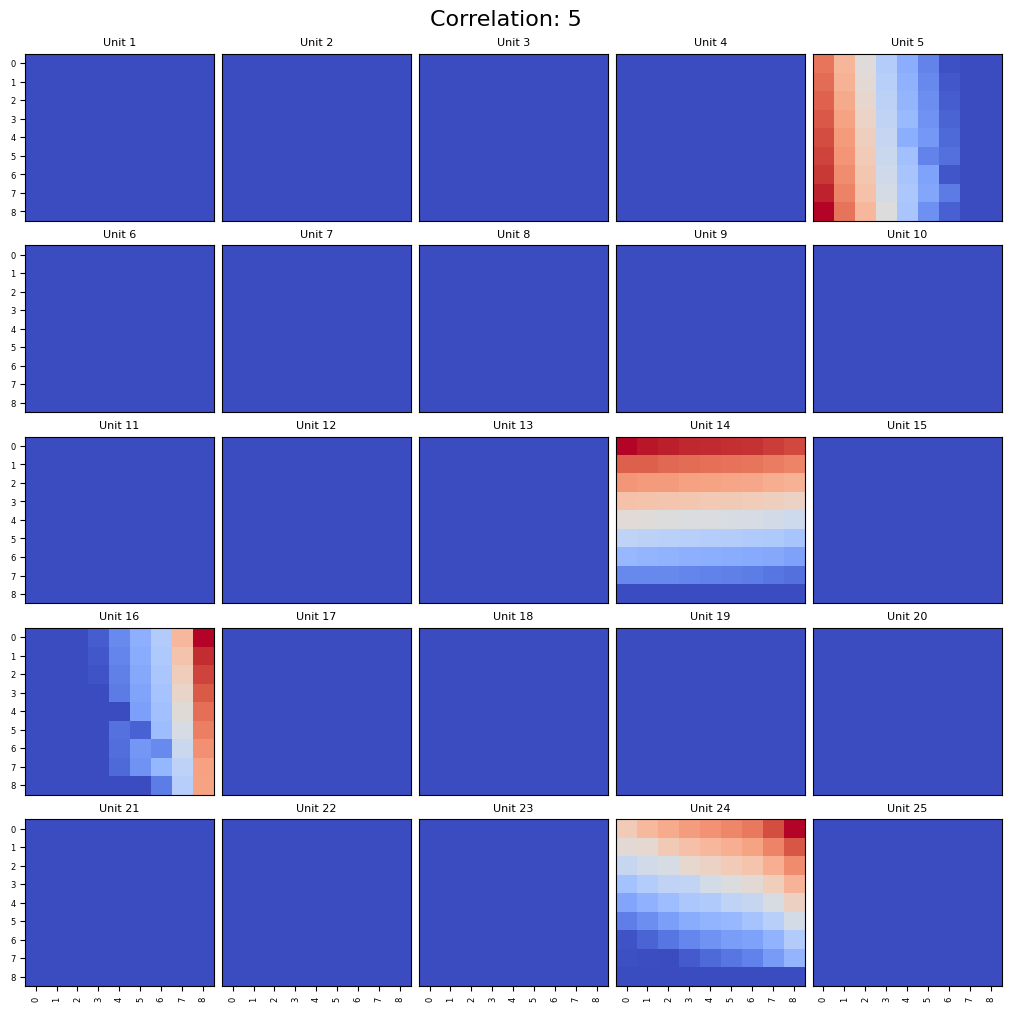

In [23]:
shapes = ['0', '1', '2', '3', '4', '5', '6', '7', '8']
locations = ['0', '1', '2', '3', '4', '5', '6', '7', '8']
model_to_plot = 0

for i, corr in enumerate(correlations):
    response = activity_data_4[i][model_to_plot]
    activations = np.array(response['activations'])
    num_combinations = activations.shape[0]
    num_hidden_units = activations.shape[2]

    grid_size = int(np.sqrt(num_combinations))
    nrows = int(np.ceil(np.sqrt(num_hidden_units)))
    ncols = nrows

    fig, axs = plt.subplots(nrows, ncols, figsize=(2 * ncols, 2 * nrows), constrained_layout=True)
    fig.suptitle(f'Correlation: {corr}', fontsize=16)
    axs = axs.flatten()

    for i in range(num_hidden_units):
        activation_grid = activations[:, 0, i].reshape((grid_size, grid_size))
        im = axs[i].imshow(activation_grid, cmap='coolwarm', aspect='auto')
        axs[i].set_title(f'Unit {i+1}', fontsize=8)
        if i // ncols == nrows - 1:
            axs[i].set_xticks(range(grid_size))
            axs[i].set_xticklabels(locations, rotation=90, fontsize=6)
        else:
            axs[i].set_xticks([])

        if i % ncols == 0:
            axs[i].set_yticks(range(grid_size))
            axs[i].set_yticklabels(shapes, fontsize=6)
        else:
            axs[i].set_yticks([])

    for ax in axs[num_hidden_units:]:
        ax.axis('off')

    plt.show()

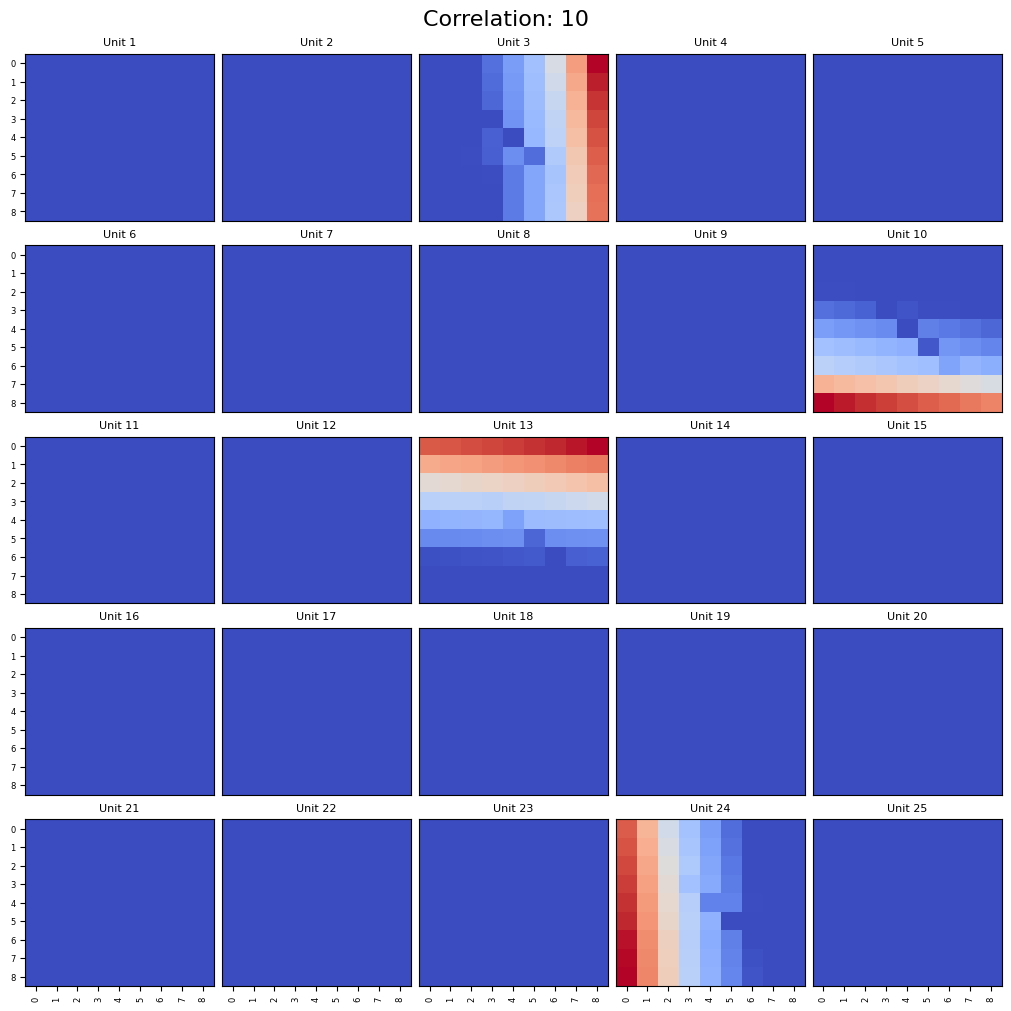

In [24]:
shapes = ['0', '1', '2', '3', '4', '5', '6', '7', '8']
locations = ['0', '1', '2', '3', '4', '5', '6', '7', '8']
model_to_plot = 1

for i, corr in enumerate(high_correlations):
    response = activity_data_41[i][model_to_plot]
    activations = np.array(response['activations'])
    num_combinations = activations.shape[0]
    num_hidden_units = activations.shape[2]

    grid_size = int(np.sqrt(num_combinations))
    nrows = int(np.ceil(np.sqrt(num_hidden_units)))
    ncols = nrows

    fig, axs = plt.subplots(nrows, ncols, figsize=(2 * ncols, 2 * nrows), constrained_layout=True)
    fig.suptitle(f'Correlation: {corr}', fontsize=16)
    axs = axs.flatten()

    for i in range(num_hidden_units):
        activation_grid = activations[:, 0, i].reshape((grid_size, grid_size))
        im = axs[i].imshow(activation_grid, cmap='coolwarm', aspect='auto')
        axs[i].set_title(f'Unit {i+1}', fontsize=8)
        if i // ncols == nrows - 1:
            axs[i].set_xticks(range(grid_size))
            axs[i].set_xticklabels(locations, rotation=90, fontsize=6)
        else:
            axs[i].set_xticks([])

        if i % ncols == 0:
            axs[i].set_yticks(range(grid_size))
            axs[i].set_yticklabels(shapes, fontsize=6)
        else:
            axs[i].set_yticks([])

    for ax in axs[num_hidden_units:]:
        ax.axis('off')

    plt.show()

### Variance-based MI

Correlation: 1, model: 4


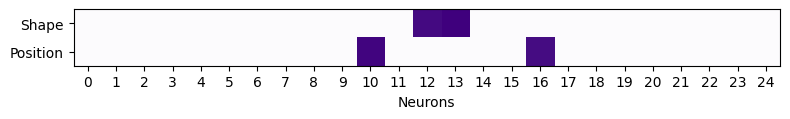

Correlation: 2, model: 4


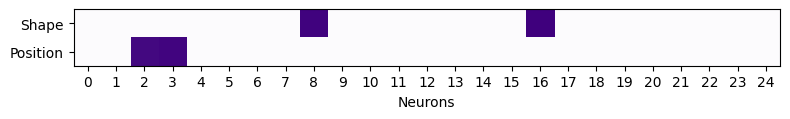

Correlation: 3, model: 4


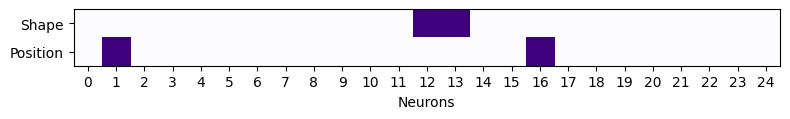

Correlation: 4, model: 4


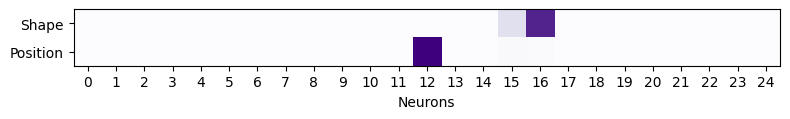

Correlation: 5, model: 4


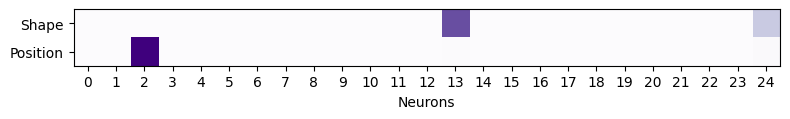

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


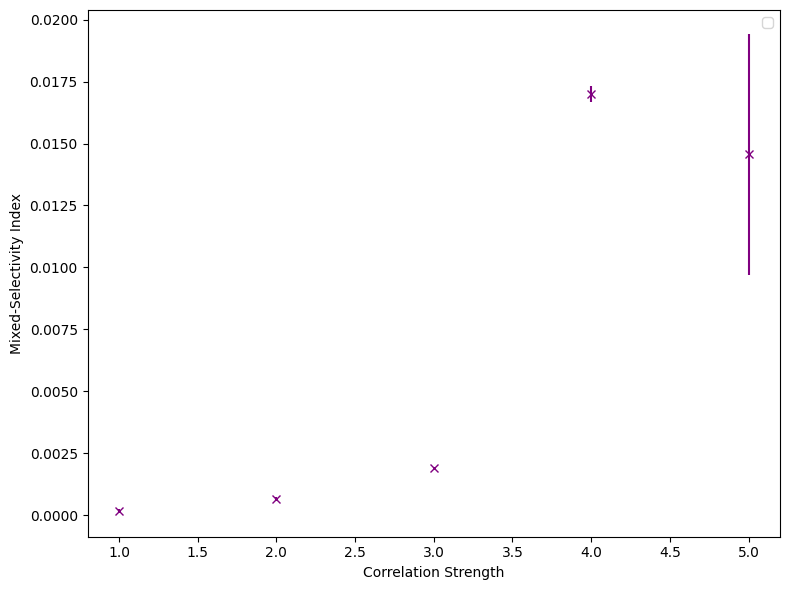

In [25]:
corr_contributions = []
for d, corr in enumerate(correlations):
    num_shapes = num_positions = 9
    variances = {
        'shape' : [],
        'position' : []
    }
    for i, response in enumerate(activity_data_4[d]):
        activations = np.array(response['activations']).reshape(-1, 25)
        inputs_info = response['input']

        organised_activations = np.zeros((num_shapes, num_positions, activations.shape[1]))

        for idx, info in enumerate(inputs_info):
            shape_idx = info['what_index']
            position_idx = info['where_index']
            organised_activations[shape_idx, position_idx] = activations[idx]

        var_shape = np.nanvar(organised_activations, axis=1)
        mean_var_shape = np.mean(var_shape, axis=0)

        var_position = np.nanvar(organised_activations, axis=0)
        mean_var_position = np.mean(var_position, axis=0)

        mean_variances = np.vstack((mean_var_shape, mean_var_position))

        variances['shape'].append(mean_var_shape)
        variances['position'].append(mean_var_position)
    print(f"Correlation: {corr}, model: {i}")
    utils.plot_shape_position_variance(mean_variances)

    contributions = []
    for shape_var, position_var in zip(variances['shape'], variances['position']):
        total_var = shape_var + position_var
        min_var = np.minimum(shape_var, position_var)
        contribution = np.sum(min_var) / np.sum(total_var)
        contributions.append(contribution)
    corr_contributions.append(contributions)
utils.plot_MI(corr_contributions, correlations, type='correlation')

### Conditional mutual information

Correlation: 1, Model: 5


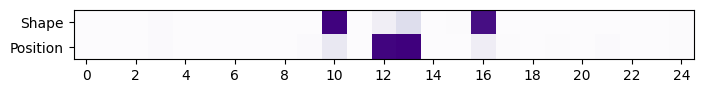

Correlation: 2, Model: 5


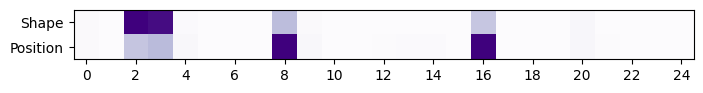

Correlation: 3, Model: 5


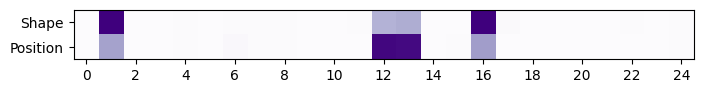

Correlation: 4, Model: 5


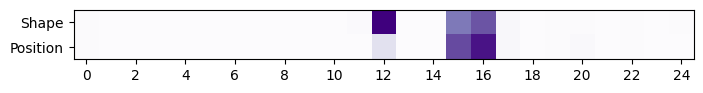

Correlation: 5, Model: 5


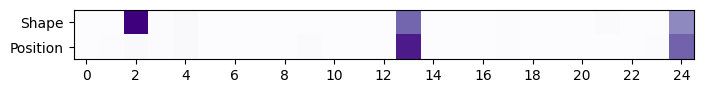

In [26]:
all_metrics = []
for i, corr in enumerate(correlations):
    corr_metrics = []
    for j, response in enumerate(activity_data_4[i]):
        activations = np.array(response['activations']).reshape(-1, 25)
        inputs_info = response['input']

        sources = np.zeros((81, 2))
        latents = np.zeros((81, 25))

        for idx, info in enumerate(inputs_info):
            sources[idx, 0] = info['what_index']
            sources[idx, 1] = info['where_index']
            latents[idx] = activations[idx]
        metrics = utils.compute_metrics(sources, latents, s_type='discrete', z_type='continuous', n_neighbors=3, n_duplicate=5, z_noise=1e-2)
        corr_metrics.append(metrics)
    print(f'Correlation: {corr}, Model: {j+1}')
    utils.plot_ncmi(metrics)
    all_metrics.append(corr_metrics)

### Source-to-source MI

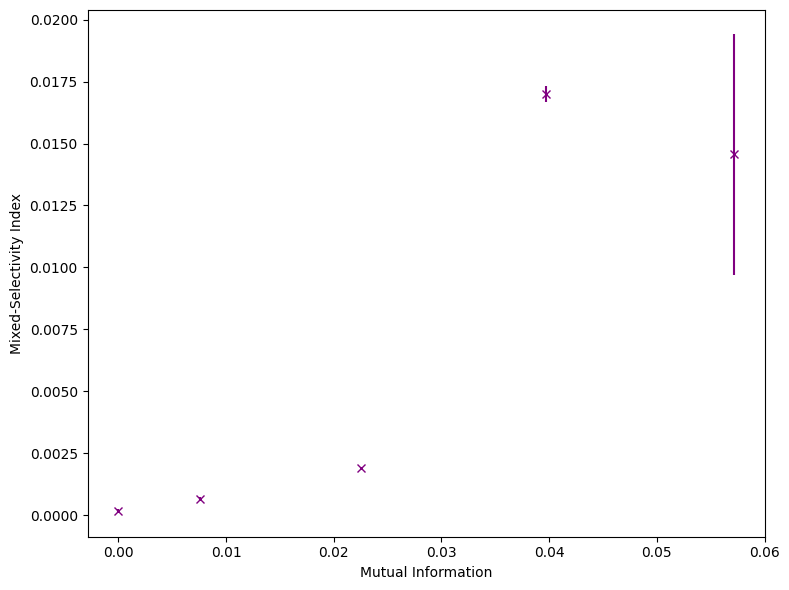

In [39]:
source1 = []
source2 = []
for d, dist in enumerate(data_distributions_4):
    model_source1 = []
    model_source2 = []
    for i, row in enumerate(dist):
        for j, el in enumerate(row):
            for k in range(int(el)):
                model_source1.append(i)
                model_source2.append(j)
    source1.append(model_source1)
    source2.append(model_source2)

corr_nmis = []
for i, corr in enumerate(correlations):
    s1 = np.array(source1[i]).reshape(-1, 1)
    s2 = np.array(source2[i]).reshape(-1, 1)
    sources = np.hstack((s1, s2))
    nmi = utils.normalized_multiinformation(sources)
    corr_nmis.append(nmi)
utils.plot_MI_vs_mi(contributions=corr_contributions, mutual_information=corr_nmis, type='correlation_strengths')

### Linear predictive information

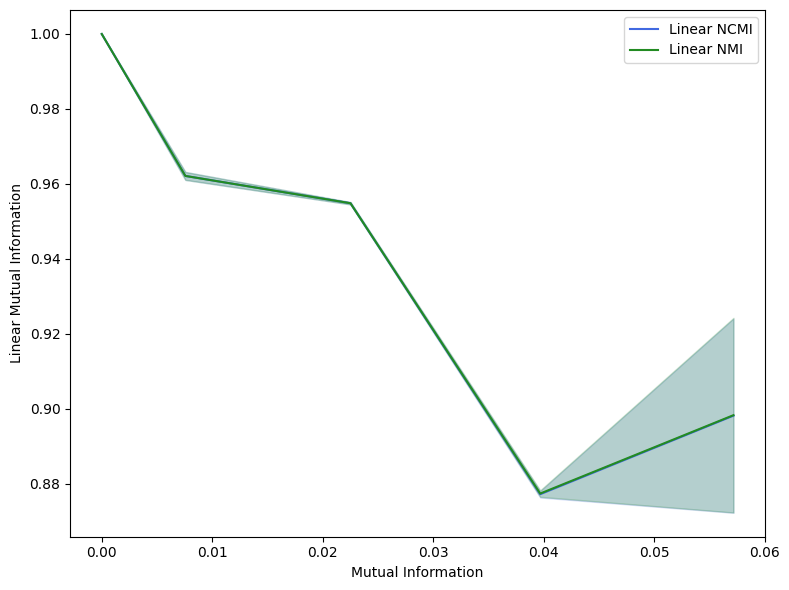

In [40]:
all_corr_lins = []
for i, corr in enumerate(correlations):
    corr_lins = []
    for j, response in enumerate(activity_data_4[i]):
        activations = np.array(response['activations']).reshape(-1, 25)
        inputs_info = response['input']

        sources = np.zeros((81, 2))
        latents = np.zeros((81, 25))

        for idx, info in enumerate(inputs_info):
            sources[idx, 0] = info['what_index']
            sources[idx, 1] = info['where_index']
            if data_distributions_4[i].flatten()[idx] == 1:
                latents[idx] = activations[idx]
            else:
                latents[idx] = np.nan
        sources = sources[~np.isnan(latents).any(axis=1)]
        latents = latents[~np.isnan(latents).any(axis=1)]
        lins = utils.compute_linear_metrics(sources, latents, 'continuous')
        # pprint(lins)
        corr_lins.append(lins)
    all_corr_lins.append(corr_lins)
utils.plot_lpmi(all_corr_lins, corr_nmis)

### Collective variance-based modularity

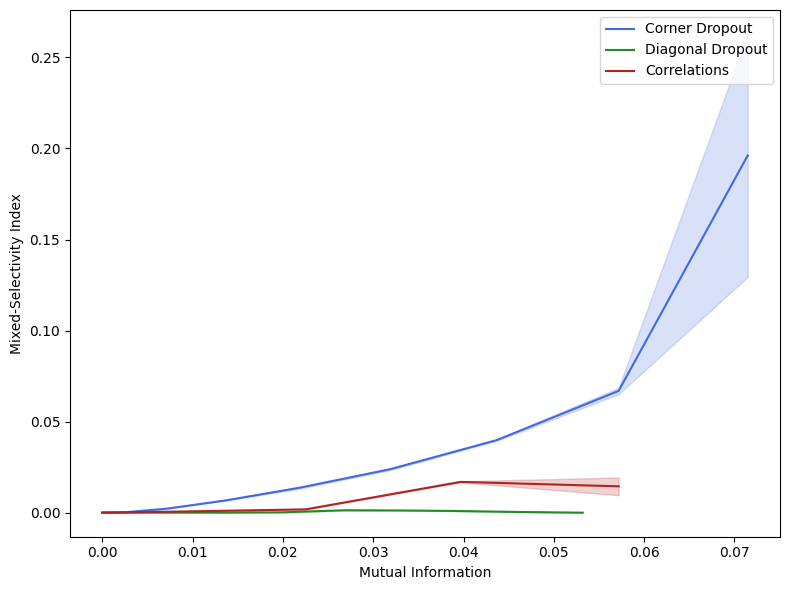

In [41]:
all_contributions = [corner_contributions, diag_contributions, corr_contributions]
all_nmis = [corner_nmis, diag_nmis, corr_nmis]
utils.plot_all_MI_vs_mi(contributions=all_contributions, mutual_informations=all_nmis)

### Collective linear predictive information

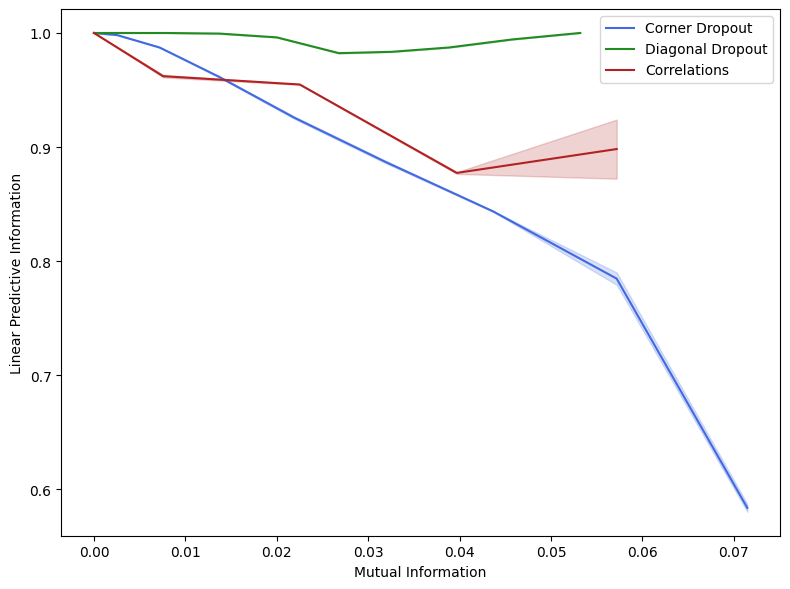

In [42]:
all_lins = [corner_lins, diag_lins, all_corr_lins]
all_nmis = [corner_nmis, diag_nmis, corr_nmis]
utils.plot_all_lpmi(lpmis=all_lins, mutual_informations=all_nmis, type='infom')